In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [2]:
output_dir = '/mnt/data'
image_set = 'val'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [3]:
coco.getCatIds()

[1, 2, 3, 4, 5]

In [4]:
print(coco.cats)

# blouse_cat = coco.cats[1]
# print(blouse_cat)

# blouse_cat['keypoints'] = ['neckline_left', 'neckline_right', 'center_front', 'shoulder_left', 
#                              'shoulder_right', 'armpit_left', 'armpit_right', 'cuff_left_in', 
#                              'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left', 
#                              'top_hem_right']
# blouse_cat['skeleton'] = [[1, 2], [1, 3], [2, 3], [1, 4], [4, 11], [6, 7], [6, 10], [2, 5], 
#                            [5, 13]]

# coco.cats[1] = blouse_cat 
# print(coco.cats[1])

{1: {'supercategory': 'blouse', 'id': 1, 'name': 'blouse', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'top_hem_left', 'top_hem_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 1], [6, 9]]}, 2: {'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 1], [7, 10]]}, 3: {'supercategory': 'outwear', 'id': 3, 'name': 'outwear', 'keypoints': ['neckline_left', 

859810714026121364
{'height': 512, 'width': 512, 'file_name': '493bc1fbff2956050e44e47b0616422c.jpg', 'id': 859810714026121364, 'category': 'blouse'}
/mnt/data/images/blouse/493bc1fbff2956050e44e47b0616422c.jpg
[1]
[{'segmentation': [], 'bbox': [198, 34, 137, 199], 'keypoints': [277, 68, 2, 239, 34, 2, 210, 46, 2, 198, 172, 2, 217, 154, 2, 220, 128, 2, 210, 233, 2, 322, 231, 2, 318, 124, 1, 318, 194, 1, 335, 189, 2, 321, 56, 2, 289, 37, 2], 'iscrowd': 0, 'image_id': 859810714026121364, 'category_id': 1, 'id': 8838479510052945428, 'area': 27263, '"num_keypoints"': 13}]


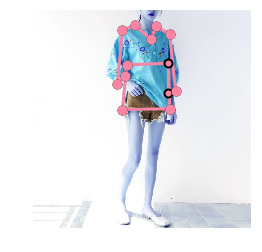

In [63]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# blouse
# img_id = 15123905676769761541
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)